这个实验需要拟合的函数为
$$y = 10*x_2/(1+x_1^2)+5*sin(x_3*x_4)+2*x_5$$

* n<p时选了n=100，p=500，所使用的网络为两层[500, 512, 1]的全连接网络


In [1]:
cd ~/keras

/home/zhengfeng/keras


In [2]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"  
os.environ["CUDA_VISIBLE_DEVICES"]=""

In [3]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import optimizers
from keras import regularizers
import matplotlib.pylab as plt

Using TensorFlow backend.


Couldn't import dot_parser, loading of dot files will not be possible.


In [4]:
%matplotlib inline

In [5]:
#[(200,500,300),(50,12,500),(50,500,500),(50,1000,1000),(100,12,500),(100,500,1000),(100,1000,1000)]
#10000,100,500 
n = 100
p = 500
problem = 'NLhard'

In [6]:
X = np.load("/home/zhengfeng/simulationData/"+problem+"_X_"+str(n)+"_"+str(p)+".npy")
y = np.load("/home/zhengfeng/simulationData/"+problem+"_Y_"+str(n)+"_"+str(p)+".npy")
ValidationX = np.load("/home/zhengfeng/simulationData/"+problem+"_VX_"+str(n)+"_"+str(p)+".npy")
Validationy = np.load("/home/zhengfeng/simulationData/"+problem+"_VY_"+str(n)+"_"+str(p)+".npy")

In [17]:
model = Sequential()
layer1 = Dense(512, activation="relu", init="normal", input_dim=p)
layer2 = Dense(1, activation="linear", init="normal", input_dim=512)
# layer3 = Dense(1, activation="linear", init="normal", input_dim=16)
# layer4 = Dense(1, activation="linear", init="normal", input_dim=16)
model.add(layer1)
model.add(layer2)
# model.add(layer3)
# model.add(layer4)
# model.add(Dense(16, input_dim=32,init='normal',activation='sigmoid'))
# model.add(Dense(1, init='normal',activation='linear'))

model.compile(loss='mean_squared_error', optimizer=optimizers.Adam())
# model.compile(loss='mean_squared_error', optimizer=optimizers.SGDModifiedOnLayer(layers=[0],tau=0.1, alpha=0.2,lr =0.01))



/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(512, kernel_initializer="normal", activation="relu", input_dim=500)`
  from ipykernel import kernelapp as app
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="normal", activation="linear", input_dim=512)`
  app.launch_new_instance()


* pre-train的结果loss为49.7（第18行），不加惩罚的时候loss不会降到45以下，这里只取了某一次训练的结果，保存W矩阵作为L1和L0的预训练参数

In [18]:
#pre-train
model.fit(X, y, validation_data=(ValidationX,Validationy),batch_size=100, nb_epoch=10)
model.save_weights("/home/zhengfeng/exp/weights.h5")
w = layer1.get_weights()
np.savetxt('/home/zhengfeng/exp/WPretrain.txt',w[0].T)

Train on 100 samples, validate on 1000 samples
Epoch 1/10
100/100 [==============================] - 0s - loss: 63.4890 - val_loss: 52.1502
Epoch 2/10
100/100 [==============================] - 0s - loss: 56.2675 - val_loss: 51.5016
Epoch 3/10
100/100 [==============================] - 0s - loss: 48.7572 - val_loss: 50.9461
Epoch 4/10
100/100 [==============================] - 0s - loss: 41.6654 - val_loss: 50.5017
Epoch 5/10
100/100 [==============================] - 0s - loss: 35.1783 - val_loss: 50.1665
Epoch 6/10
100/100 [==============================] - 0s - loss: 29.3189 - val_loss: 49.9254
Epoch 7/10
100/100 [==============================] - 0s - loss: 24.0973 - val_loss: 49.7671
Epoch 8/10
100/100 [==============================] - 0s - loss: 19.5068 - val_loss: 49.6831
Epoch 9/10
100/100 [==============================] - 0s - loss: 15.4908 - val_loss: 49.6667
Epoch 10/10
100/100 [==============================] - 0s - loss: 12.0303 - val_loss: 49.7099


* 第19行为拟合结果与ground truth的对比，描出validation set的前100个点

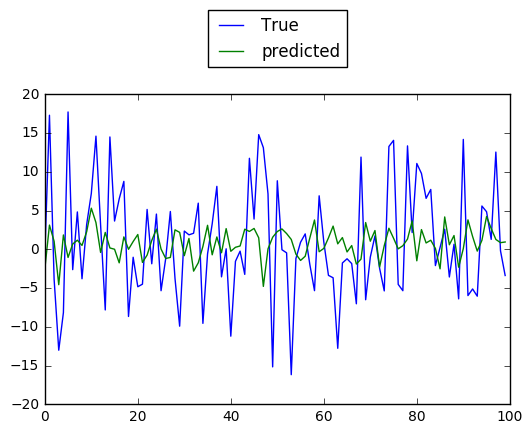

In [19]:
predictY = model.predict(ValidationX)
plt.plot(Validationy[:100], label = 'True')
plt.plot(predictY[:100], label = "predicted")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3))
plt.show()

In [20]:
w_count = np.full_like(w[0].T[0],0)
w_sum = np.full_like(w[0].T[0],0.0)
for i in range(w[0].T.shape[0]):
    w_sum += abs(w[0].T[i])
    w_count += (abs(w[0].T[i])>0)*1

* 第21行为第一层权重W，绝大多数在0.1以下，于是L0中τ可以设0.1

In [21]:
w[0].T[0]

array([ 0.00937035,  0.05150624, -0.02842034,  0.02196969, -0.00691478,
        0.0140101 ,  0.02625199,  0.04704414,  0.0349799 ,  0.00533794,
        0.04610661, -0.13900948, -0.03626831, -0.02388443,  0.05495463,
        0.02768393, -0.02046372,  0.08920036, -0.04310184,  0.07983712,
       -0.03980219,  0.01632234, -0.12858151,  0.01999023, -0.00926996,
        0.05219437, -0.00060723, -0.06573825,  0.03611104,  0.08192112,
        0.00577029,  0.03518297,  0.01992603, -0.03668468,  0.02051567,
        0.00044924,  0.01443713,  0.05383594, -0.03114327, -0.03064309,
       -0.06607843,  0.08099151, -0.02011938,  0.08315706,  0.01895078,
        0.04129704, -0.02376798, -0.03593781, -0.01079469, -0.08612786,
        0.10117985,  0.0241924 ,  0.00296819,  0.03883892, -0.00872521,
        0.02430515,  0.07019562, -0.00439832, -0.01909417,  0.03143217,
        0.03820961,  0.0486381 , -0.04634891, -0.07266414,  0.03059717,
       -0.03121174, -0.09387047,  0.03762564,  0.00897523, -0.06

* 22行为500个feature在512个neuron上（512行）上非零值的统计

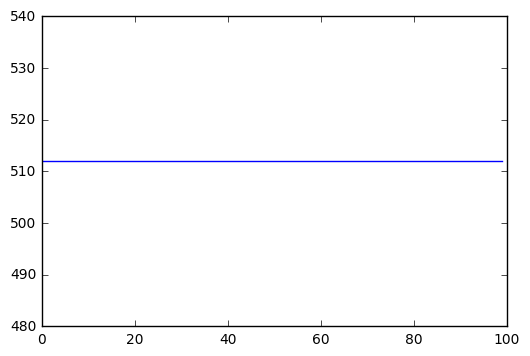

In [22]:
plt.plot(w_count[:100])

*第23行为500个feature在512个neuron上权重绝对值的累加（可以作为feature对结果impact的一个参考）

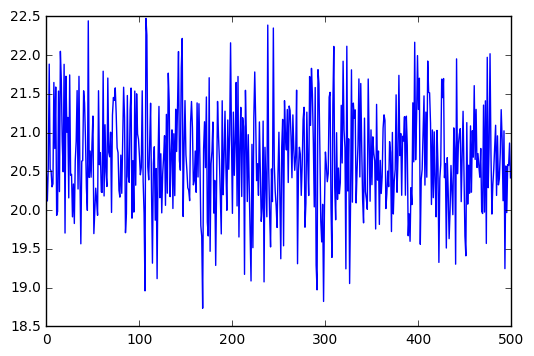

In [23]:
plt.plot(w_sum)

* L1penalty加在与上面结构相同的网络的第一层上，使用上面的预训练参数W，L1用validation loss调strength基本可以达到的最小loss为24，在这次训练中，270epoch的时候开始过拟合，validation loss逐渐增加，本次使用的strength为0.1

In [ ]:
#L1 

loaded_model_l1 = Sequential()
layer1 = Dense(512, activation="relu", init="normal", input_dim=p, W_regularizer=regularizers.l1(0.1))
# layer1 = Dense(16, activation="relu", init="normal", input_dim=p, kernel_regularizer=regularizers.l1(0.05))#activity_regularizer=regularizers.l1(0.1)
layer2 = Dense(1, activation="linear", init="normal", input_dim=512)
# layer3 = Dense(1, activation="linear", init="normal", input_dim=16)

loaded_model_l1.add(layer1)
loaded_model_l1.add(layer2)
# loaded_model_l1.add(layer3)

loaded_model_l1.load_weights("/home/zhengfeng/exp/weights.h5")
loaded_model_l1.compile(loss='mean_squared_error', optimizer=optimizers.Adam())
loaded_model_l1.fit(X, y, validation_data=(ValidationX,Validationy), batch_size=15, nb_epoch=300)
score2 = loaded_model_l1.evaluate(ValidationX, Validationy, batch_size=128)
w = layer1.get_weights()
np.savetxt('/home/zhengfeng/exp/WL1.txt',w[0].T)

* 第28行为拟合结果与ground truth的对比，描出validation set的前100个点

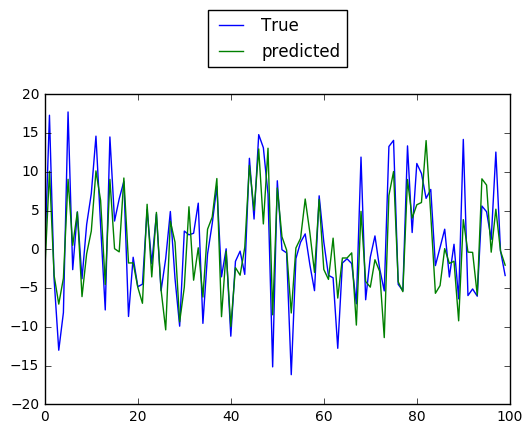

In [28]:
predictY = loaded_model_l1.predict(ValidationX)
plt.plot(Validationy[:100], label = 'True')
plt.plot(predictY[:100], label = "predicted")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3))
plt.show()

In [29]:
weight_L1 = np.loadtxt('/home/zhengfeng/exp/WL1.txt')
w_count = np.full_like(weight_L1[0],0)
w_sum = np.full_like(weight_L1[0],0.0)
for i in range(weight_L1.shape[0]):
    w_sum += abs(weight_L1[i])
    w_count += (abs(weight_L1[i])>0)*1

* 第30行为第一层W的500个feature在512个neuron上的非零权重的统计，因为keras库里的L1 penalty不会强调稀疏性（在我自己的实现里面L1会收敛到稀疏解，但是在非线性条件下我的实现没有keras收敛到的解好），我没有去改它的的标准L1 penalty实现，所以全部的实验中，l1的结果都不稀疏

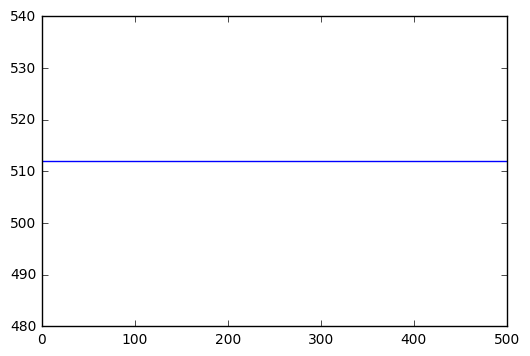

In [30]:
plt.plot(w_count)

* 第31行为100个feature在512个neuron上权重绝对值的求和

<Container object of 100 artists>

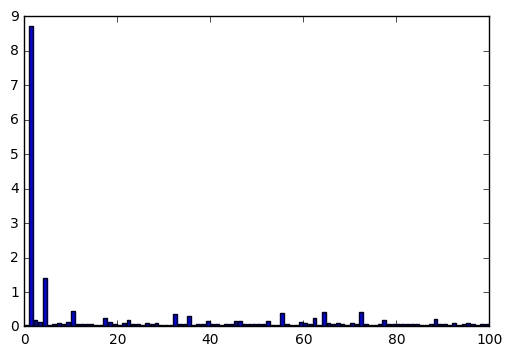

In [31]:
plt.bar(range(100),w_sum[:100])

* 下面是L0训练，使用与上面相同的网络，第一层加L0penalty，τ=0.1，strength=1，learning rate =0.005（这里我实现了基于Adam和SGD的L0，试验中adam比SGD难调，于是都采用了SGD），L0可以达到比L1更小的Loss，此处为16.4

In [41]:
#l0training

loaded_model = Sequential()
# layer1 = Dense(16, activation="relu", init="normal", input_dim=p, W_regularizer=regularizers.l1(0.5))
layer1 = Dense(512, activation="relu", init="normal", input_dim=p)
layer2 = Dense(1, activation="linear", init="normal", input_dim=512)
# layer3 = Dense(1, activation="linear", init="normal", input_dim=16)
# layer4 = Dense(1, activation="linear", init="normal", input_dim=16)
# layer3 = Dense(1, activation="linear", init="normal", input_dim=16)

loaded_model.add(layer1)
loaded_model.add(layer2)
# loaded_model.add(layer3)
# loaded_model.add(layer4)
loaded_model.load_weights("/home/zhengfeng/exp/weights.h5")
# loaded_model.compile(loss='mean_squared_error', optimizer=optimizers.AdamModified(tau=0.2, alpha=0.2, lr = 0.1))
# loaded_model.compile(loss='mean_squared_error', optimizer=optimizers.SGDModified(tau=0.2, alpha=0.1,lr =0.05))
loaded_model.compile(loss='mean_squared_error', optimizer=optimizers.SGDModifiedOnLayer(layers=[0],tau=0.1, alpha=1,lr =0.005))
# loaded_model.compile(loss='mean_squared_error', optimizer=optimizers.Adam()5
loaded_model.fit(X, y, validation_data=(ValidationX,Validationy), batch_size=100, nb_epoch=200)
score2 = loaded_model.evaluate(ValidationX, Validationy, batch_size=128)
w = layer1.get_weights()
np.savetxt('/home/zhengfeng/exp/WL0.txt',w[0].T)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(512, kernel_initializer="normal", activation="relu", input_dim=500)`
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="normal", activation="linear", input_dim=512)`


Train on 100 samples, validate on 1000 samples
Epoch 1/200
100/100 [==============================] - 0s - loss: 9.1276 - val_loss: 49.6331
Epoch 2/200
100/100 [==============================] - 0s - loss: 7.6403 - val_loss: 49.4988
Epoch 3/200
100/100 [==============================] - 0s - loss: 7.2071 - val_loss: 49.3418
Epoch 4/200
100/100 [==============================] - 0s - loss: 7.3704 - val_loss: 49.1650
Epoch 5/200
100/100 [==============================] - 0s - loss: 7.9812 - val_loss: 48.9959
Epoch 6/200
100/100 [==============================] - 0s - loss: 8.9839 - val_loss: 48.8030
Epoch 7/200
100/100 [==============================] - 0s - loss: 10.3132 - val_loss: 48.6311
Epoch 8/200
100/100 [==============================] - 0s - loss: 11.9078 - val_loss: 48.4898
Epoch 9/200
100/100 [==============================] - 0s - loss: 13.8463 - val_loss: 48.3913
Epoch 10/200
100/100 [==============================] - 0s - loss: 16.0191 - val_loss: 48.3104
Epoch 11/200
100/1

* 拟合结果与ground truth对比

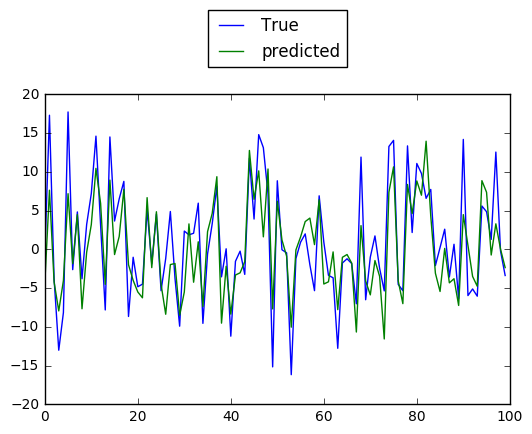

In [42]:
predictY = loaded_model.predict(ValidationX)
plt.plot(Validationy[:100], label = 'True')
plt.plot(predictY[:100], label = "predicted")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3))
plt.show()

In [44]:
weight_L0 = np.loadtxt('/home/zhengfeng/exp/WL0.txt')

In [45]:
w_count = np.full_like(weight_L0[0],0)
w_sum = np.full_like(weight_L0[0],0.0)
for i in range(weight_L0.shape[0]):
    w_sum += abs(weight_L0[i])
    w_count += (abs(weight_L0[i])>0)*1

* 第46行为500个feature在512个neuron上非零权重的计数，x2,x3,x5被选中，第47行为前50个feature的计数，第48行为前100个feature权重绝对值的求和

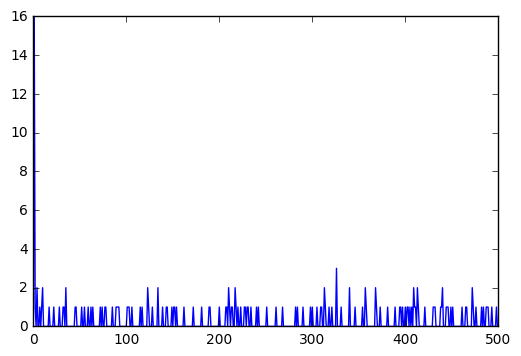

In [46]:
plt.plot(w_count)

<Container object of 50 artists>

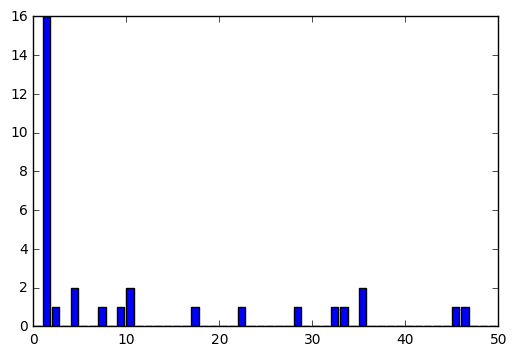

In [47]:
plt.bar(range(50),w_count[:50])

<Container object of 100 artists>

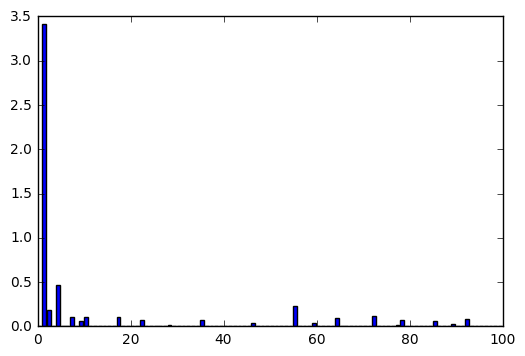

In [48]:
plt.bar(range(100),w_sum[:100])